# Graduate Admissions
Predicting admission from important parameters

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

read data

In [15]:
data = pd.read_csv('Admission_predict.csv') 

The dataset contains several parameters which are considered important during the application for Masters Programs in 
UCLA graduate school.This dataset was built with the purpose of helping students in shortlisting universities with 
their profiles. 
We have 2 goals for conducting analysis for this dataset. Frist, we aim to use our predicted output
to give applicants a fair idea about their chances for the particular university and secondly,distinguish whether 
certain factors are weighted more important in the application process.

In [16]:
#inspect data, check head of the data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


from above, the admission dataset includes variables of 'serial No.', 'GRE Score',‘TOEFL Score','University Rating',
'SOP'(Statement of Purpose Strength),'LOR'(Letter of Recommendation Strength),'CGPA'(Undergraduate GPA),
'Research'(whether has research experiences),'Chance of Admit'

In [6]:
#check number of rows and columns
data.shape

(400, 9)

In [ ]:
#from above result, there are 9 variables with 400 observations.

In [7]:
#check variable types,and numeric statistics + categorical variable frequencies.
data= pd.DataFrame(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
#check again the null data
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
#there are no missing value in the dataset.

In [8]:
#check summary statistics of all of our numeric variables and whether there are outliers exist in the dataset
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
#we cleaned up the above by removed scientific notation with only 2 decimal points print
for col in data.columns:
    print(data[col].describe().apply(lambda x:format(x, '.2f')))

count    400.00
mean     200.50
std      115.61
min        1.00
25%      100.75
50%      200.50
75%      300.25
max      400.00
Name: Serial No., dtype: object
count    400.00
mean     316.81
std       11.47
min      290.00
25%      308.00
50%      317.00
75%      325.00
max      340.00
Name: GRE Score, dtype: object
count    400.00
mean     107.41
std        6.07
min       92.00
25%      103.00
50%      107.00
75%      112.00
max      120.00
Name: TOEFL Score, dtype: object
count    400.00
mean       3.09
std        1.14
min        1.00
25%        2.00
50%        3.00
75%        4.00
max        5.00
Name: University Rating, dtype: object
count    400.00
mean       3.40
std        1.01
min        1.00
25%        2.50
50%        3.50
75%        4.00
max        5.00
Name: SOP, dtype: object
count    400.00
mean       3.45
std        0.90
min        1.00
25%        3.00
50%        3.50
75%        4.00
max        5.00
Name: LOR , dtype: object
count    400.00
mean       8.60
std        0.6

In [ ]:
#there is no outlier exist in the dataset, 
#since the data ranges are:
#1.for GRE Scores ( out of 340 ) 
#2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 
#4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
#5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 )
#7. Chance of Admit ( ranging from 0 to 1 )
#in addition, we could see the means of each varaibles with standard deviations. 

In [18]:
#we pulled the mean data out seperately to have a more clear check up of the means
data.mean(axis = 0) 

Serial No.           200.500000
GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64

In [25]:
import seaborn as sns
import matplotlib.pylab as plb
import datetime as dt
import networkx as nx

In [18]:
#we first try to check the distribution of each variables, 

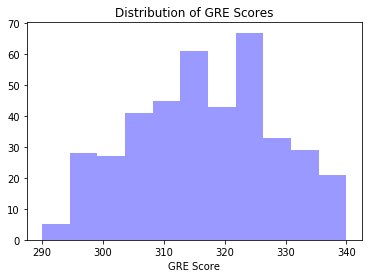

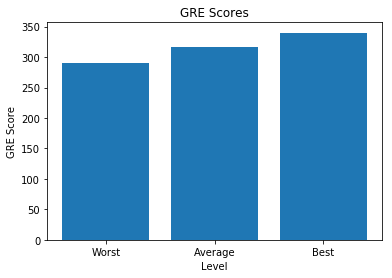

In [86]:
#Distribution of the GRE score
fig = sns.distplot(data['GRE Score'], color='blue', kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

y = np.array([data["GRE Score"].min(),data["GRE Score"].mean(),data["GRE Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")
plt.show()

In [ ]:
#most people score between 310 to 420 and 322 to 328.

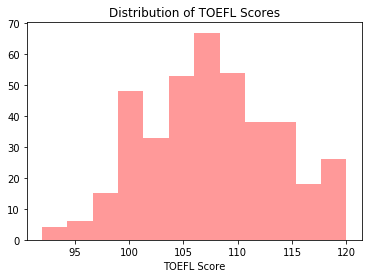

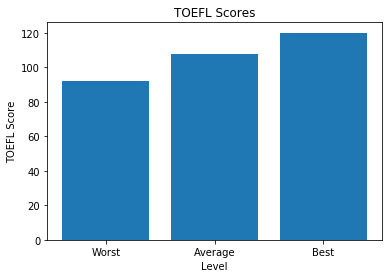

In [87]:
#distribution of TOEFL SCORE
fig = sns.distplot(data['TOEFL Score'], color='red',kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

y = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

In [ ]:
#most people score between 105-110 with 
#the lowest TOEFL score is 92 and the highest Toefl score is 120. The average is 107.41.

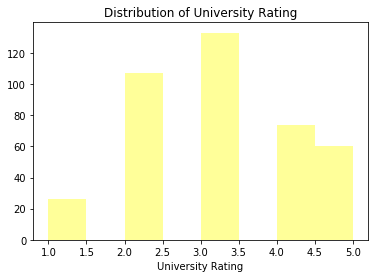

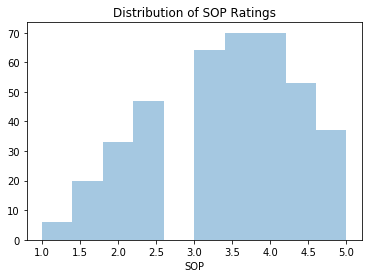

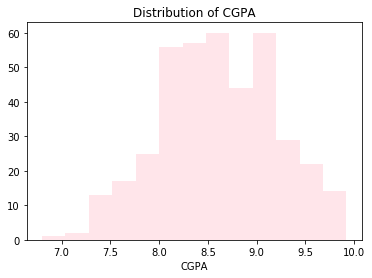

In [88]:
#distribution of University rating and sop, cgpa
fig = sns.distplot(data['University Rating'],color='yellow', kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(data['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(data['CGPA'],color='pink', kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

In [38]:
#count each category in the research variable
data['Research'].value_counts()

1    219
0    181
Name: Research, dtype: int64

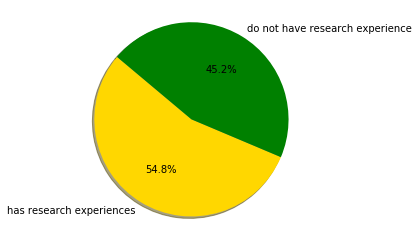

In [47]:
#draw a pic chart to inspect the distribution of whether have research experience
labels ='has research experiences', 'do not have research experience'
sizes = [219,181]
colors = ['gold','green']
 
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [ ]:
#It is clear from the distributions, students with varied merit apply for the university.

#so now we are trying to understanding the relation between different factors responsible for graduate admissions.

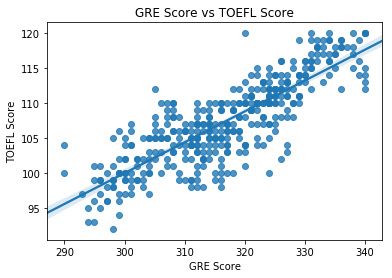

In [21]:
#First, we want to test whether there is a correlation between GRE Score and TOEFL Score
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=data)
plt.title("GRE Score vs TOEFL Score")
plt.show()
#from the plot,people with higher GRE Scores also have higher TOEFL Scores

In [63]:
print(data[['GRE Score','TOEFL Score']].corr())

             GRE Score  TOEFL Score
GRE Score     1.000000     0.835977
TOEFL Score   0.835977     1.000000


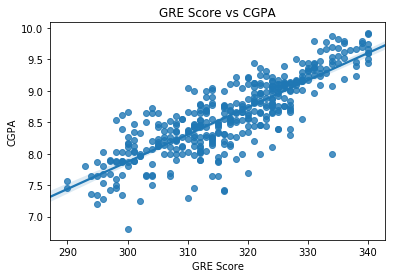

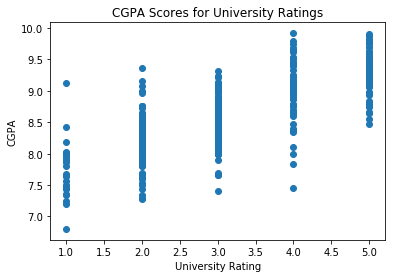

In [89]:
#check correlation between GRE score and univeristy gpa
fig = sns.regplot(x="GRE Score", y="CGPA", data=data)
plt.title("GRE Score vs CGPA")
plt.show()

plt.scatter(data["University Rating"],data.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()
#Candidates with high GRE scores usually have a high CGPA score.

In [70]:
print(data[['GRE Score','CGPA']].corr())
#seems a correlation exist between those two variables

           GRE Score     CGPA
GRE Score    1.00000  0.83306
CGPA         0.83306  1.00000


In [17]:
#check correlation in whole dataset without serial NO. column
data2 = data.drop(['Serial No.'], axis=1)

In [66]:
print(data2.corr())

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.567721  0.828417  0.489858          0.791594  
University Rating  0.660123  0.746479  0.447783          0.711250  
SOP                0.729593  0.718144  0.444029          0.67

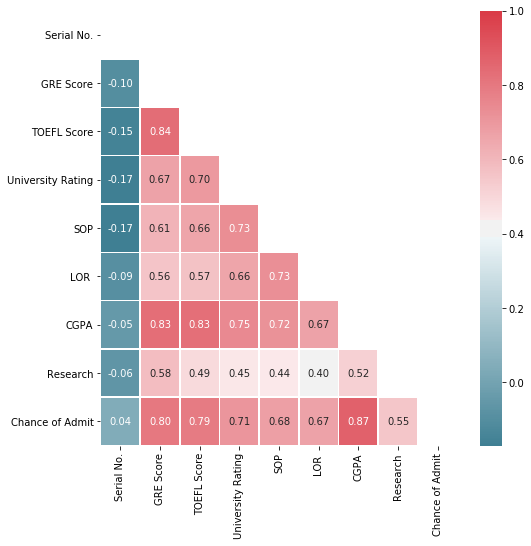

In [26]:
#plot the correlations
corr = data2.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [ ]:
#we could clearly see that some variables are highly correlated while some are not, 
#variables that are highly correlated are:
# TOEFL Score and GRE Score
#CGPA and GRE Score
#CGPA and TOEFL Score
#it also looks like that chance of admit are highly correlated with GRE score, Toefl score, and CGPA

In [27]:
#Serial No. is deleted because it stores index values. 
#In the future this column does not benefit for regression algorithms.
data2 = data.drop(['Serial No.'], axis=1)
data2=data.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [28]:
#prepare data for regression
x = data2.drop(['Chance of Admit'], axis=1)
y = data2['Chance of Admit']

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [24]:
#Normalization (min-max scaling):It makes values scaled to a fixed range (0-1).
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

In [39]:
#Linear Regression:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)

from sklearn.metrics import r2_score
y_head_lr_train = lr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_lr_train))
print("mean_squared_error(train dataset): ", (np.sqrt(mean_squared_error(y_train, y_head_lr_train))))
print("r_square score(test dataset): ", r2_score(y_test,y_head_lr))
print("mean_squared_error(test dataset): ", (np.sqrt(mean_squared_error(y_test, y_head_lr))))


r_square score (train dataset):  0.821568876797417
mean_squared_error(train dataset):  0.06050705997230057
r_square score(test dataset):  0.7441980464658411
mean_squared_error(test dataset):  0.06977736499151381


In [38]:
#random forest regression
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train,y_train)
y_head_rfr = rfr.predict(x_test) 

from sklearn.metrics import r2_score
y_head_rf_train = rfr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_rf_train))
print("mean_squared_error(train dataset): ", (np.sqrt(mean_squared_error(y_train, y_head_rf_train))))
print("r_square score(test dataset): ", r2_score(y_test,y_head_rfr))
print("mean_squared_error(test dataset): ", (np.sqrt(mean_squared_error(y_test, y_head_rfr))))


r_square score (train dataset):  0.9762154953774339
mean_squared_error(train dataset):  0.022091123405869037
r_square score(test dataset):  0.7972735277629942
mean_squared_error(test dataset):  0.06211805776100858


In [130]:
#decision tree regression
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)
y_head_dtr = dtr.predict(x_test) 

y_head_dtr_train = dtr.predict(x_train)

print("r_square score (train dataset): ", r2_score(y_train,y_head_dtr_train))
print("mean_squared_error(train dataset): ", (np.sqrt(mean_squared_error(y_train, y_head_dtr_train))))
print("r_square score(test dataset): ", r2_score(y_test,y_head_dtr))
print("mean_squared_error(test dataset): ", (np.sqrt(mean_squared_error(y_test, y_head_dtr))))


r_square score (train dataset):  1.0
mean_squared_error(train dataset):  1.5202354861220293e-17
r_square score(test dataset):  0.8002293224097611
mean_squared_error(test dataset):  0.07182443873780009


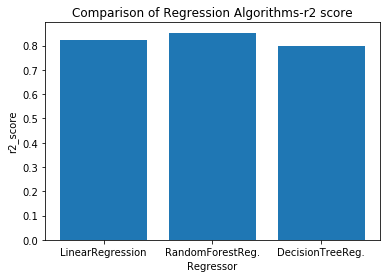

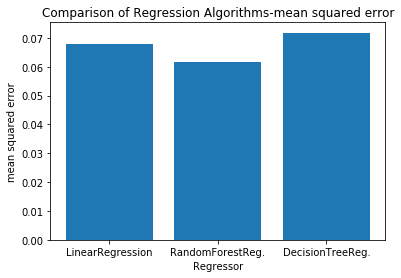

In [133]:
#compare regression algorithms
y = np.array([r2_score(y_test,y_head_lr),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms-r2 score")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

y = np.array([np.sqrt(mean_squared_error(y_test, y_head_lr)),np.sqrt(mean_squared_error(y_test, y_head_rfr)),np.sqrt(mean_squared_error(y_test, y_head_dtr))])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms-mean squared error")
plt.xlabel("Regressor")
plt.ylabel("mean squared error")
plt.show()

In [ ]:
#Linear regression and random forest regression algorithms were better than decision tree regression algorithm.

In [36]:
#other models to predict
from sklearn.model_selection import train_test_split
x = data2.drop(['Chance of Admit'], axis=1)
y = data2['Chance of Admit']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, shuffle=False)
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")
for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))


Results...
DecisionTree : 0.0863944442658207
Linear Regression : 0.06977736499151381
RandomForest : 0.060731869722576465
KNeighbours : 0.1320350332298212
SVM : 0.14046361826414738
AdaBoostClassifier : 0.06775865688890782


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GradientBoostingClassifier:  0.061740970539767036
Lasso:  0.12986406341392598
Ridge:  0.07029053329707274
BayesianRidge:  0.07163630224690623
ElasticNet:  0.11038139744474842
HuberRegressor:  0.0696959647213084


In [176]:
#remove low correlation variables
#prepare data for regression
data3 = data2.drop(['SOP','Research'], axis=1)
x = data3.drop(['Chance of Admit'], axis=1)
y = data3['Chance of Admit']
# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)

from sklearn.metrics import r2_score
y_head_lr_train = lr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_lr_train))
print("mean_squared_error(train dataset): ", (np.sqrt(mean_squared_error(y_train, y_head_lr_train))))
print("r_square score(test dataset): ", r2_score(y_test,y_head_lr))
print("mean_squared_error(test dataset): ", (np.sqrt(mean_squared_error(y_test, y_head_lr))))

#similar results

r_square score (train dataset):  0.8116387516817294
mean_squared_error(train dataset):  0.059662882231800204
r_square score(test dataset):  0.8148615543481184
mean_squared_error(test dataset):  0.06914402805880956


In [200]:
#check feature importances
x = data2.drop(['Chance of Admit'], axis=1)
y = data2['Chance of Admit']
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor()
classifier.fit(x,y)
feature_names = x.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = x.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)
importance_frame

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Features,Importance
7,Research,0.006943
3,University Rating,0.011010
4,SOP,0.014935
5,LOR,0.019259
2,TOEFL Score,0.038840
0,Serial No.,0.068768
1,GRE Score,0.097442
6,CGPA,0.742802


In [ ]:
#CGPA is the most factor for graduate admissions followed by GRE Score.

Predict your chance of admit from your grades

In [ ]:
import pandas as pd
def predict_score():
    GRE=int(input('What is your GRE score out of 340?'))
    TOEFL=int(input('What is your TOEFL score out of 120?'))
    UniversityRating=int(input('What is your University Rating out of 5?'))
    SOP=int(input('What is your rating of statement of purpose out of 5?'))
    LOR=int(input('What is your rating of recommendation strength out of 5?'))
    CGPA=int(input('What is your CGPA out of 10?'))
    Research=int(input('DO you have any research experiences, either no as 0 or yeas as 1?'))
    Score=(GRE,TOEFL,UniversityRating, SOP, LOR,CGPA,Research)
    Score= np.array(Score)
    Score=Score.reshape(-1,1)
    chance=lr.predict(Score)
    return chance
print("Your chance of admitting is: "+str("%.5f"%(chance[0]*100))+" %")
predict_score()